In [111]:
from glob import glob
from pickle import load
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

base_dir = "C:\\Users\\Chris\\co_cloudcover\\"
raw_dir = base_dir + "data\\raw\\"
model_dir = base_dir + "models\\"


with open(model_dir + "rfc_20240527.pkl", "rb") as f:
    rfc1 = load(f)

IC_parquets = glob(raw_dir + 'ImageCollection_2023*')# + "ImageCollection_*.parquet")    
IC_parquets

['C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202301',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202302',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202303',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202304',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202305',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202306',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202307',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202308',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202309',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202310',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202311',
 'C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202312']

In [96]:
features = [
    "sur_refl_b01",
    "sur_refl_b02",
    "sur_refl_b03",
    "sur_refl_b04",
    "sur_refl_b05",
    "sur_refl_b06",
    "sur_refl_b07",
]

try:
    del(day_count,cloud_count)
except:
    pass

model_results = []
for IC_parquet in IC_parquets:#["C:\\Users\\Chris\\co_cloudcover\\data\\raw\\ImageCollection_202307"]:#
    result_name = IC_parquet.split('_')[-1]
    print(IC_parquet)
    IC = gpd.read_parquet(IC_parquet)
    IC['date'] = IC['time'].dt.strftime("%Y-%m-%d")
    IC["prediction"] = np.nan_to_num(rfc1.predict(IC[features]),nan=0)

    IC_day_count = IC.\
        groupby(['geometry']).\
        agg("count").\
        reset_index()\
        [["prediction","geometry"]]
    IC_cloud_count = IC[IC["prediction"]=="snow_cloud"].\
        groupby(['geometry']).\
        agg("count").\
        reset_index()\
        [["prediction","geometry"]]

    model_results.append({
        'name':result_name,
        'day_count':IC_day_count,
        'cloud_count':IC_cloud_count
    })
    
    """try:
        day_count["prediction"] = day_count["prediction"] + IC_day_count["prediction"]
        cloud_count["prediction"] = cloud_count["prediction"] + IC_cloud_count["prediction"]
    except NameError:
        print("creating aggregate gdfs")
        day_count = IC_day_count[["prediction","geometry"]]
        cloud_count = IC_cloud_count[["prediction","geometry"]]

    day_count["clouds"] = cloud_count["prediction"]
    gdf = gpd.GeoDataFrame(IC_cloud_count)

    fig, ax = plt.subplots()
    gdf.plot(column="prediction",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=0, vmax=30)
    plt.show()"""

C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202301
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202302
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202303
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202304
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202305
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202306
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202307
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202308
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202309
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202310
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202311
C:\Users\Chris\co_cloudcover\data\raw\ImageCollection_202312


In [87]:
temp_IC = gpd.GeoDataFrame(cloud_count)#[IC["time"]=="2023-07-02"]
temp_IC['lon'],temp_IC['lat'] = temp_IC.geometry.x,temp_IC.geometry.y
temp_IC = temp_IC[temp_IC["lon"]>-102.5]
temp_IC = temp_IC[temp_IC["lat"]<37.5]
temp_IC

,prediction,geometry,lon,lat
0,6,POINT (-102.24500 36.25500),-102.245,36.255
1,5,POINT (-102.24500 36.26500),-102.245,36.265
2,7,POINT (-102.24500 36.27500),-102.245,36.275
3,7,POINT (-102.24500 36.28500),-102.245,36.285
4,6,POINT (-102.24500 36.29500),-102.245,36.295
...,...,...,...,...
1549,5,POINT (-102.04500 36.29500),-102.045,36.295
1550,5,POINT (-102.04500 36.28500),-102.045,36.285
1551,7,POINT (-102.04500 36.27500),-102.045,36.275
1552,7,POINT (-102.04500 36.26500),-102.045,36.265


202301


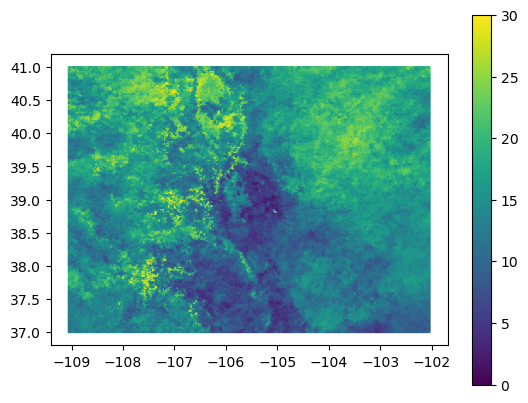

202302


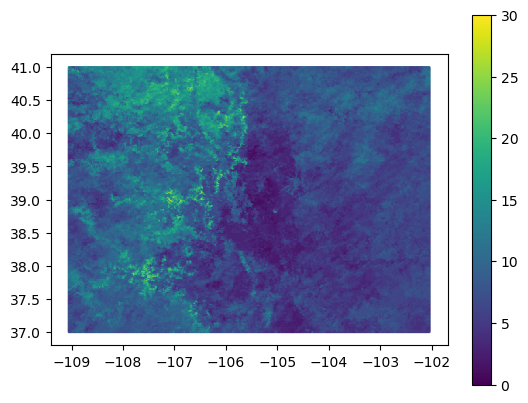

202303


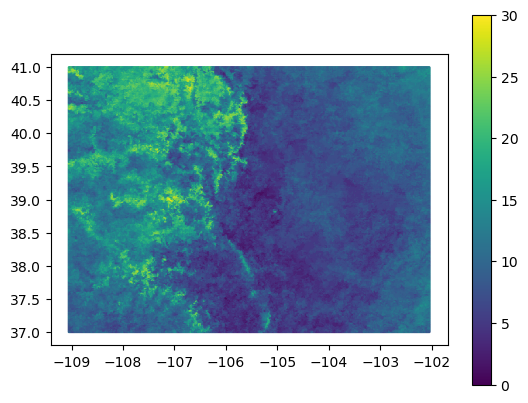

202304


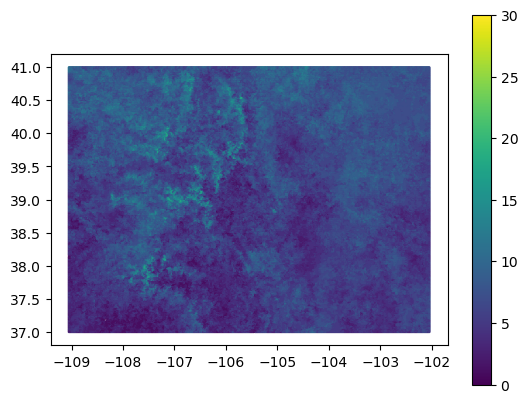

202305


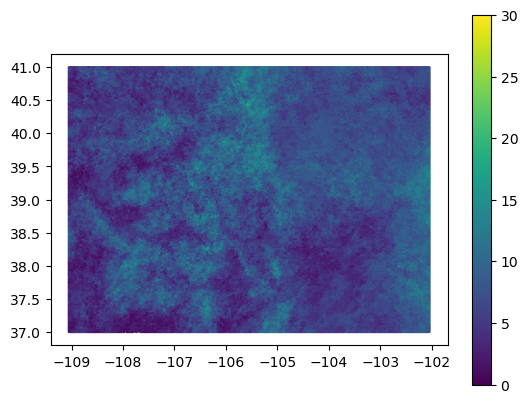

202306


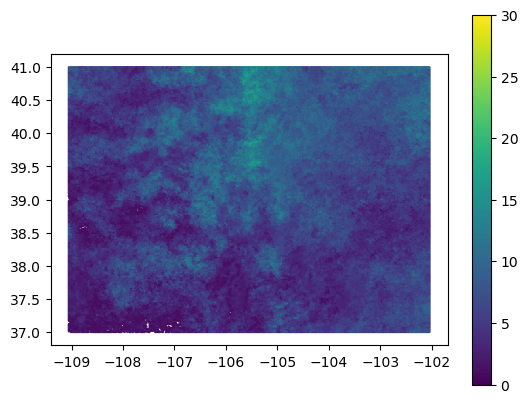

202307


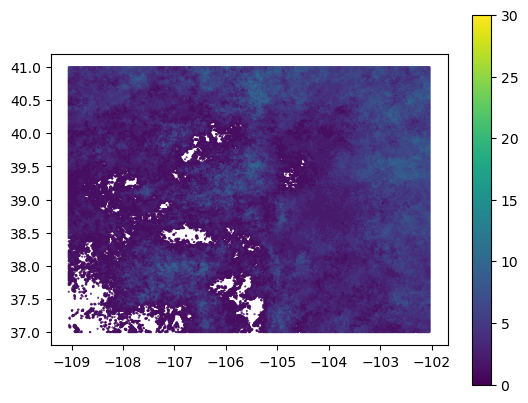

202308


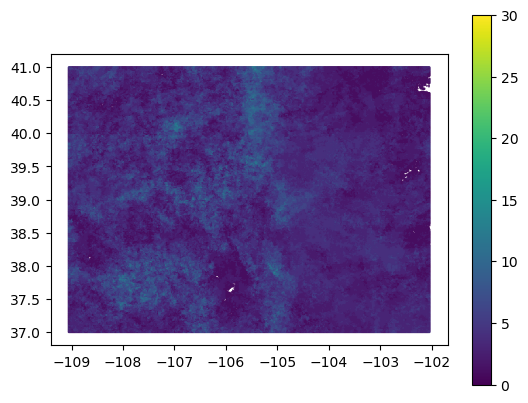

202309


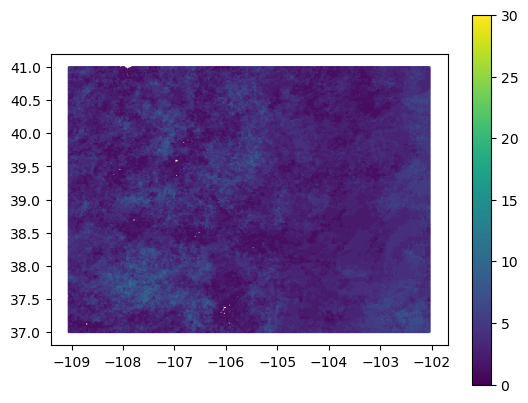

202310


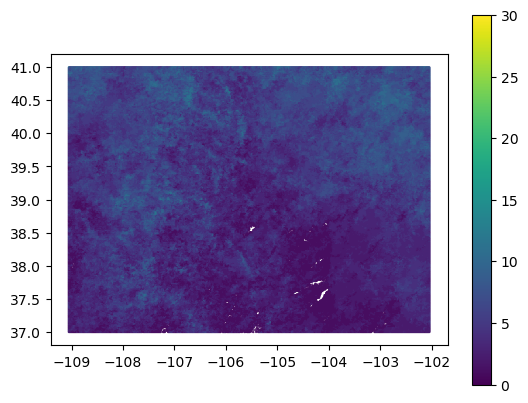

202311


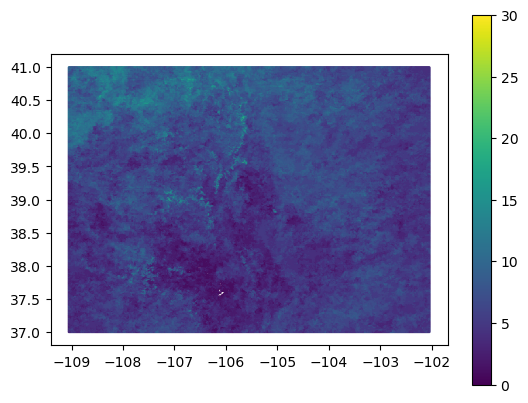

202312


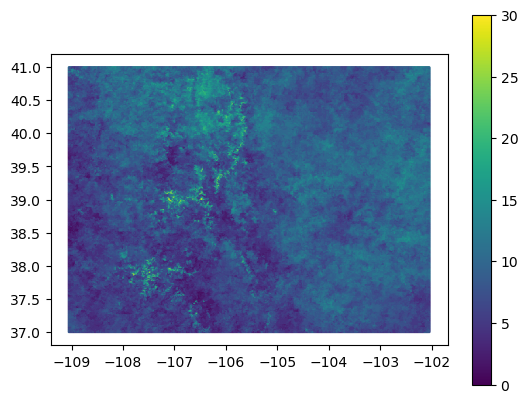

In [103]:
"""temp_IC = IC[IC["time"]=="2023-07-02"]

for IC_date in list(set(IC["time"])):
    temp_IC = IC[IC["time"]==IC_date]
    print(IC_date)
    fig, ax = plt.subplots()
    temp_IC.plot(column="prediction",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=0, vmax=30)
    plt.show()"""

for result in model_results:
    name,days,clouds = result['name'], result['day_count'], result['cloud_count']
    print(name)
    fig, ax = plt.subplots()
    clouds = gpd.GeoDataFrame(clouds)
    clouds.plot(column="prediction",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=0, vmax=30)
    plt.show()

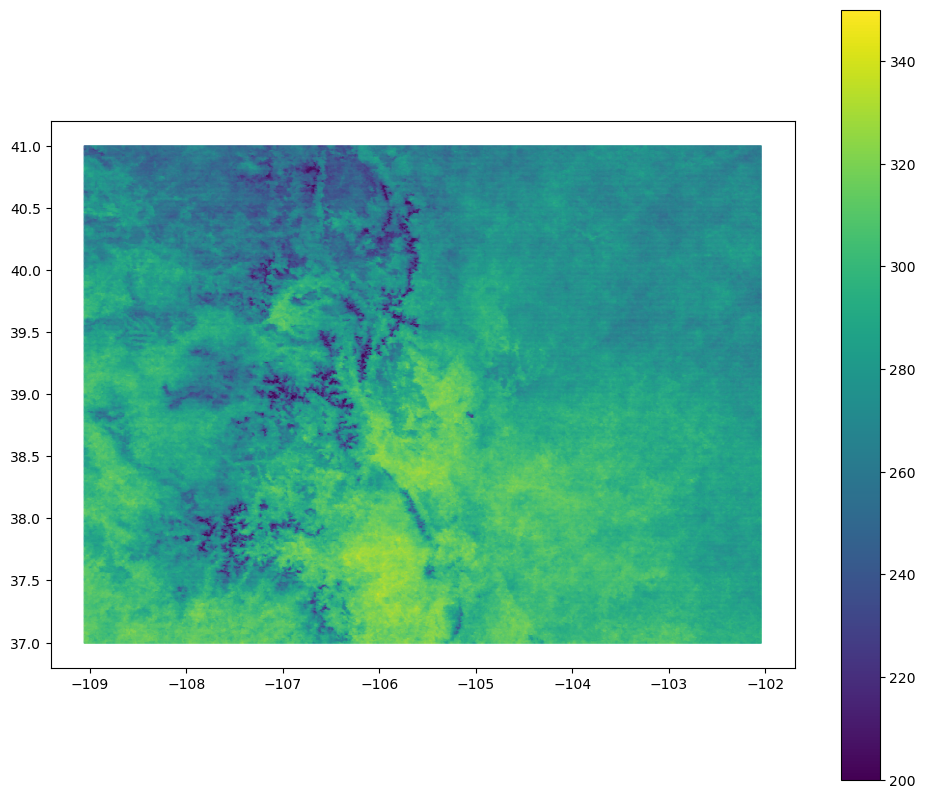

In [131]:
"""clouds_list = []
for result in model_results:
    name,days,clouds = result['name'], result['day_count'], result['cloud_count']
    clouds_list.append(clouds)
    #if result['name'] != '202307': continue
    #print(result)

clouds_2023 = pd.concat(clouds_list).\
        groupby(['geometry']).\
        agg("sum").\
        reset_index()\
        [["prediction","geometry"]]"""

fig, ax = plt.subplots()
clouds = gpd.GeoDataFrame(clouds_2023)
clouds["365"] = 365
clouds["DoS"] = clouds["365"] - clouds["prediction"]
#clouds.plot(column="DoS",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=50, vmax=150)
clouds.plot(column="DoS",legend=True, figsize = (12,10), markersize=.2, ax=ax, vmin=200, vmax=350)
fig.set_size_inches(12,10)
plt.show()

In [95]:
day_count["clouds"] = cloud_count["prediction"]
gdf = gpd.GeoDataFrame(day_count)
gdf
#gdf.plot(column="clouds",legend=True, figsize = (12,10), markersize=.2)

,prediction,geometry,clouds
0,365,POINT (-109.05420 36.99775),59.0
1,365,POINT (-109.04420 36.99775),58.0
2,365,POINT (-109.05420 37.00775),57.0
3,365,POINT (-109.04420 37.00775),52.0
4,365,POINT (-109.03420 37.00775),55.0
...,...,...,...
281497,365,POINT (-102.06420 37.00775),NaN
281498,365,POINT (-102.05420 37.00775),NaN
281499,365,POINT (-102.04420 37.00775),NaN
281500,365,POINT (-102.05420 36.99775),NaN
